# **NAMA: FAKHRUL IBAD**
# **NIM: 2104111100212**

**1. Naive Bayes**

Import library, yaitu library numpy, matplotlib, dan pandas

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ambil data dari ``https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv``, lalu dimasukkan ke dalam variabel dataset dan ditampilkan 10 data pertama

In [23]:
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:,:4].values
y = dataset['target'].values
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Setelah data dimuat, lalu data dibagi menjadi 2 berupa *training set* dan *test set*, tiap kelas diberi urutan. Nilai 0.2 itu berarti 20%, dan dijadikan dalam *test set* sisa 80% dijadikan *training set*

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Data diperkecil ke rentang yang lebih kecil menggunakan Feature Scaling. Dalam hal ini, nilai X_train dan X_test diperkecil ke nilai yang lebih kecil untuk meningkatkan kecepatan program.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menambahkan class GaussianNB yang diambil dari library sklearn.naive_bayes.

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Setelah model selesai, lalu menggunakan classifier.predict() untuk memprediksi nilai dari Test set dan nilai yang diprediksi akan disimpan dalam variabel.

In [28]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Confusion matrix adalah tabel yang digunakan untuk menunjukkan jumlah prediksi yang benar dan salah pada suatu masalah klasifikasi ketika nilai sebenarnya dari Test Set diketahui. 

Nilai True adalah jumlah prediksi yang benar.

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.7868852459016393


array([[22,  7],
       [ 6, 26]])

Akurasi dari ada di atas = 0.7868852459016393, itu berarti data tersebut benar  78.7%

**2. KNN**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [45]:
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Memisahkan Features dan Label

Pada tahap ini dilakukan operasi slicing untuk membagi data dari dalam objek DataFrame. Pada tahap ini juga akan diambil data sebagai array, bukan objek DataFrame. Hal ini dilakukan karena library scikit-learn menggunakan tipe data NumPy array untuk digunakan dalam algoritmanya.

In [68]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 13].values

Membagi Data Latih dan Uji

Di sini akan membagi 150 data untuk latih dan uji. Lalu menggunakan fungsi train_test_split untuk memudahkan proses pembagian data agar data yang dibagi seimbang.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state=42)

Label Encoding

Karena kelas dari dataset ini berupa teks, maka perlu dilakukan encoding. Pada kasus ini akan digunakan label encoding

In [70]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Menentukan Nilai Konstanta *k*

Seperti yang sudah di jelaskan sebelumnya, bahwa KNN membutuhkan suatu nilai konstanta *k* untuk menentukan berapa banyak tetangga yang akan digunakan oleh model. Kode di bawah ini akan melakukan training sebanyak 40 kali dengan nilai 
*k* dari 1 hingga 40. Angka 40 ini bersifat bebas dan dapat diganti dengan angka lain.

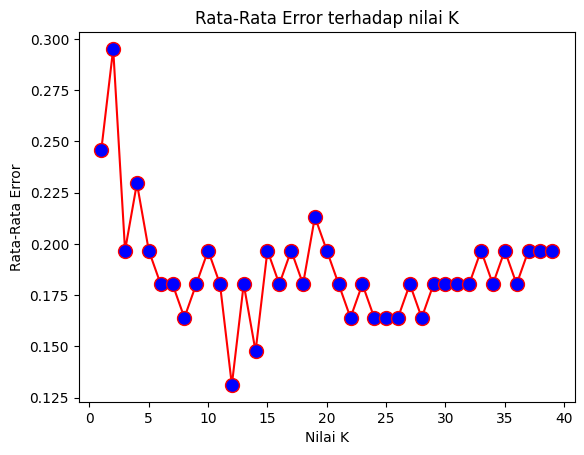

In [72]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Training

Pada proses training ini kamu akan menggunakan nilai konstanta *k* = 4.

In [73]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Evaluation

Setelah proses training, lalu akan dievaluasi apakah model yang dibuat memiliki akurasi yang baik atau belum.

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))